In [2]:
import pandas as pd
import numpy as np

df_Cab_Data = pd.read_csv("Kaggle Data/Cab_Data.csv")
df_Cab_Data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,07-01-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,03-01-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [3]:
df_Cab_Data.shape

(359392, 7)

In [4]:
df_City = pd.read_csv("Kaggle Data/City.csv",thousands=',')

df_City.head()

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


In [5]:
df_City.shape

(20, 3)

In [66]:
df_City.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int64 
 2   Users       20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes


In [68]:
df_City.describe().round(2)

,Population,Users
count,20.00,20.00
mean,1231592.00,64520.65
std,1740126.70,83499.38
min,248968.00,3643.00
25%,608637.25,11633.25
50%,784559.00,23429.00
75%,1067041.00,91766.00
max,8405837.00,302149.00


In [70]:
#adding a new feature PercentageUser
df_City['PercentageUser'] = (df_City['Users']/ df_City['Population'])*100
df_City.head()

,City,Population,Users,PercentageUser
0,NEW YORK NY,8405837,302149,3.594514
1,CHICAGO IL,1955130,164468,8.412126
2,LOS ANGELES CA,1595037,144132,9.036279
3,MIAMI FL,1339155,17675,1.319862
4,SILICON VALLEY,1177609,27247,2.313756


In [6]:
df_Customer_ID = pd.read_csv("Kaggle Data/Customer_ID.csv")

df_Customer_ID.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [7]:
df_Customer_ID.shape

(49171, 4)

In [8]:
df_Transaction_ID = pd.read_csv("Kaggle Data/Transaction_ID.csv")

df_Transaction_ID.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [9]:
df_Transaction_ID.shape

(440098, 3)

In [10]:
df_Holiday_Dates = pd.read_csv("Kaggle Data/US holiday dates/US Holiday Dates.csv")
df_Holiday_Dates.head()

,Date,Holiday,WeekDay,Month,Day,Year
0,2004-07-04,4th of July,Sunday,7,4,2004
1,2005-07-04,4th of July,Monday,7,4,2005
2,2006-07-04,4th of July,Tuesday,7,4,2006
3,2007-07-04,4th of July,Wednesday,7,4,2007
4,2008-07-04,4th of July,Friday,7,4,2008


In [11]:
df_Holiday_Dates.shape

(342, 6)

In [12]:
# Prepare Holiday_Data for merging
df_Holiday_Dates['Date of Travel'] = pd.to_datetime(df_Holiday_Dates['Date'])
Holiday = [1]*df_Holiday_Dates.shape[0]
df_Holiday_Dates['Holiday'] = Holiday
df_Holiday_Dates = df_Holiday_Dates[['Date of Travel','Holiday']]
df_Holiday_Dates.drop_duplicates()
df_Holiday_Dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date of Travel  342 non-null    datetime64[ns]
 1   Holiday         342 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.5 KB


In [13]:
df_Holiday_Dates.head()

,Date of Travel,Holiday
0,2004-07-04,1
1,2005-07-04,1
2,2006-07-04,1
3,2007-07-04,1
4,2008-07-04,1


In [14]:
#Merging Transaction DF and Customer DF
df_TransCust_ID = df_Customer_ID.merge(df_Transaction_ID, on="Customer ID")
df_TransCust_ID.head()

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode
0,29290,Male,28,10813,10000011,Card
1,29290,Male,28,10813,10351127,Cash
2,29290,Male,28,10813,10412921,Card
3,27703,Male,27,9237,10000012,Card
4,27703,Male,27,9237,10320494,Card


In [15]:
df_TransCust_ID.shape

(440098, 6)

In [16]:
df_master = df_Cab_Data.merge(df_TransCust_ID, on="Transaction ID")
df_master.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Male,28,10813,Card
1,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Male,27,9237,Card
2,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Male,53,11242,Cash
3,10000014,07-01-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Male,23,23327,Cash
4,10000015,03-01-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Male,33,8536,Card


In [17]:
df_master.shape

(359392, 12)

In [18]:
df_master['Date of Travel'] = pd.to_datetime(df_master['Date of Travel'])
df_master['Year'] = df_master['Date of Travel'].dt.year #adding a new 'Year' column
df_master['Month'] = df_master['Date of Travel'].dt.month #adding a new 'Month' column

df_master.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Year,Month
0,10000011,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Male,28,10813,Card,2016,8
1,10000012,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Male,27,9237,Card,2016,6
2,10000013,2016-02-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Male,53,11242,Cash,2016,2
3,10000014,2016-07-01,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Male,23,23327,Cash,2016,7
4,10000015,2016-03-01,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Male,33,8536,Card,2016,3


In [19]:
#df_master2 = df_master.merge(df_Holiday_Dates, how="outer", on="Date of Travel")
#df_master.head()

In [20]:

df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Customer ID         359392 non-null  int64         
 8   Gender              359392 non-null  object        
 9   Age                 359392 non-null  int64         
 10  Income (USD/Month)  359392 non-null  int64         
 11  Payment_Mode        359392 non-null  object        
 12  Year                359392 non-null  int64         
 13  Month               359392 no

In [21]:
#Creating new features 

df_master["Profit"] = df_master["Price Charged"]-df_master["Cost of Trip"]

df_master["ProfitPercentage"] = ((df_master["Price Charged"] - df_master["Cost of Trip"])/df_master["Cost of Trip"])*100

df_master["Profit_per_KM"] = df_master["Profit"]/ df_master["KM Travelled"]

df_master.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Year,Month,Profit,ProfitPercentage,Profit_per_KM
0,10000011,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Male,28,10813,Card,2016,8,57.315,18.274427,1.882266
1,10000012,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Male,27,9237,Card,2016,6,23.666,7.067558,0.826904
2,10000013,2016-02-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Male,53,11242,Cash,2016,2,27.568,28.236644,3.049558
3,10000014,2016-07-01,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Male,23,23327,Cash,2016,7,25.798,7.337273,0.777751
4,10000015,2016-03-01,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Male,33,8536,Card,2016,3,16.844,17.227131,1.929439


In [22]:
age_conditions = [
    (df_master['Age'] < 20),
    (df_master['Age'] >= 20) & (df_master['Age'] < 30),
    (df_master['Age'] >= 30) & (df_master['Age'] < 40),
    (df_master['Age'] >= 40) & (df_master['Age'] < 50),
    (df_master['Age'] >= 50) & (df_master['Age'] < 60),
    (df_master['Age'] >= 60)
]

age_values = ['<20 years old', 
              '20-29 years old',
              '30-39 years old',
              '40-49 years old',
              '50-59 years old',
              '60+ years old']

df_master['Age Group'] = np.select(age_conditions, age_values)

df_master.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Year,Month,Profit,ProfitPercentage,Profit_per_KM,Age Group
0,10000011,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Male,28,10813,Card,2016,8,57.315,18.274427,1.882266,20-29 years old
1,10000012,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Male,27,9237,Card,2016,6,23.666,7.067558,0.826904,20-29 years old
2,10000013,2016-02-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Male,53,11242,Cash,2016,2,27.568,28.236644,3.049558,50-59 years old
3,10000014,2016-07-01,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Male,23,23327,Cash,2016,7,25.798,7.337273,0.777751,20-29 years old
4,10000015,2016-03-01,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Male,33,8536,Card,2016,3,16.844,17.227131,1.929439,30-39 years old


In [23]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Customer ID         359392 non-null  int64         
 8   Gender              359392 non-null  object        
 9   Age                 359392 non-null  int64         
 10  Income (USD/Month)  359392 non-null  int64         
 11  Payment_Mode        359392 non-null  object        
 12  Year                359392 non-null  int64         
 13  Month               359392 no

In [24]:
# Find continuous features
numerical_features = df_master.select_dtypes(include=['int64', 'float64']).columns

df_master[numerical_features] = df_master[numerical_features].round(2)

numerical_features

Index(['Transaction ID', 'KM Travelled', 'Price Charged', 'Cost of Trip',
       'Customer ID', 'Age', 'Income (USD/Month)', 'Year', 'Month', 'Profit',
       'ProfitPercentage', 'Profit_per_KM'],
      dtype='object')

In [25]:
# Find categorical features
categorical_features = df_master.select_dtypes(include=['object']).columns

categorical_features

Index(['Company', 'City', 'Gender', 'Payment_Mode', 'Age Group'], dtype='object')

In [26]:
df_master = df_master.reindex(columns=[
'Transaction ID','Customer ID','Date of Travel','Year','Month','City','KM Travelled','Price Charged','Cost of Trip','Profit','ProfitPercentage','Profit_per_KM','Gender','Age','Age Group','Income (USD/Month)','Payment_Mode','Company'])
df_master.head(20)

,Transaction ID,Customer ID,Date of Travel,Year,Month,City,KM Travelled,Price Charged,Cost of Trip,Profit,ProfitPercentage,Profit_per_KM,Gender,Age,Age Group,Income (USD/Month),Payment_Mode,Company
0,10000011,29290,2016-08-01,2016,8,ATLANTA GA,30.45,370.95,313.64,57.32,18.27,1.88,Male,28,20-29 years old,10813,Card,Pink Cab
1,10000012,27703,2016-06-01,2016,6,ATLANTA GA,28.62,358.52,334.85,23.67,7.07,0.83,Male,27,20-29 years old,9237,Card,Pink Cab
2,10000013,28712,2016-02-01,2016,2,ATLANTA GA,9.04,125.20,97.63,27.57,28.24,3.05,Male,53,50-59 years old,11242,Cash,Pink Cab
3,10000014,28020,2016-07-01,2016,7,ATLANTA GA,33.17,377.40,351.60,25.80,7.34,0.78,Male,23,20-29 years old,23327,Cash,Pink Cab
4,10000015,27182,2016-03-01,2016,3,ATLANTA GA,8.73,114.62,97.78,16.84,17.23,1.93,Male,33,30-39 years old,8536,Card,Pink Cab
5,10000016,27318,2016-07-01,2016,7,ATLANTA GA,6.06,72.43,63.02,9.41,14.92,1.55,Male,25,20-29 years old,13984,Cash,Pink Cab
6,10000017,33788,2016-03-01,2016,3,AUSTIN TX,44.00,576.15,475.20,100.95,21.24,2.29,Male,23,20-29 years old,23788,Card,Pink Cab
7,10000018,34106,2016-07-01,2016,7,AUSTIN TX,35.65,466.10,377.89,88.21,23.34,2.47,Male,19,<20 years old,19980,Card,Pink Cab
8,10000019,59799,2016-12-01,2016,12,BOSTON MA,14.40,191.61,146.88,44.73,30.45,3.11,Male,33,30-39 years old,19271,Cash,Pink Cab
9,10000020,57982,2016-06-01,2016,6,BOSTON MA,10.89,156.98,113.26,43.72,38.61,4.02,Male,57,50-59 years old,5068,Cash,Pink Cab


In [27]:
df_master.isnull().sum()

Transaction ID        0
Customer ID           0
Date of Travel        0
Year                  0
Month                 0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Profit                0
ProfitPercentage      0
Profit_per_KM         0
Gender                0
Age                   0
Age Group             0
Income (USD/Month)    0
Payment_Mode          0
Company               0
dtype: int64

In [28]:
duplicate_values = df_master[['Transaction ID','Customer ID']].duplicated().any()
duplicate_values

False

In [29]:
duplicate_values2 = df_master[['Company', 'City']].duplicated().any()
duplicate_values2

True

In [30]:
df_master['Company'].value_counts()

Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64

In [31]:
df_master['City'].value_counts()

NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64

In [32]:
df_master['Gender'].value_counts()

Male      205912
Female    153480
Name: Gender, dtype: int64

In [33]:
df_master['Payment_Mode'].value_counts()

Card    215504
Cash    143888
Name: Payment_Mode, dtype: int64

In [34]:
company_profit = df_master.groupby('Company')['Profit'].sum().reset_index()

# Display the result
print("Total Profit by Company:")
print(company_profit)

Total Profit by Company:
      Company       Profit
0    Pink Cab   5307328.51
1  Yellow Cab  44020372.59


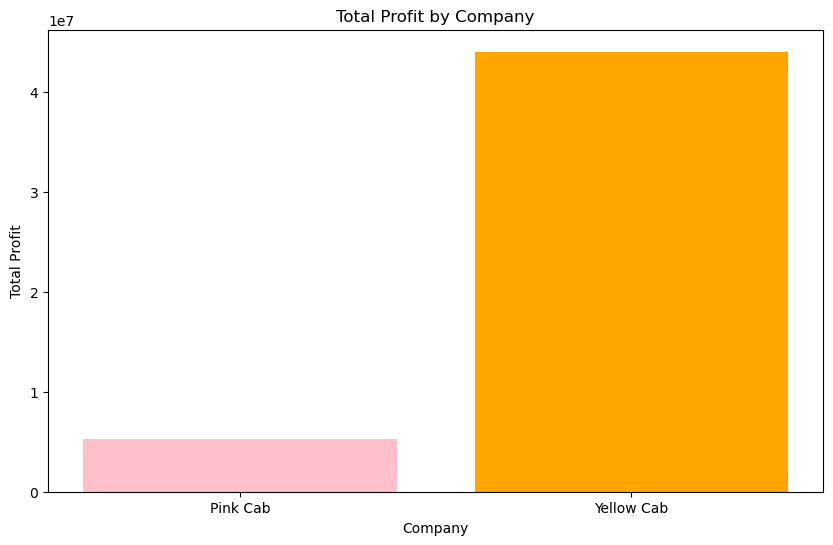

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(company_profit['Company'], company_profit['Profit'], color=['pink', 'orange'])  
plt.xlabel('Company')
plt.ylabel('Total Profit')
plt.title('Total Profit by Company')
plt.show()

In [36]:
# Assuming your DataFrame is named df_master
# Group by gender and company and calculate total profit and average age
grouped_data = df_master.groupby(['Gender', 'Company']).agg({
    'Profit': 'sum',
    'Age': 'mean'
}).reset_index()

# Display the result
print("Grouped Data by Gender and Company:")
print(grouped_data)


Grouped Data by Gender and Company:
   Gender     Company       Profit        Age
0  Female    Pink Cab   2330533.20  35.270518
1  Female  Yellow Cab  18131418.09  35.293129
2    Male    Pink Cab   2976795.31  35.363596
3    Male  Yellow Cab  25888954.50  35.376189


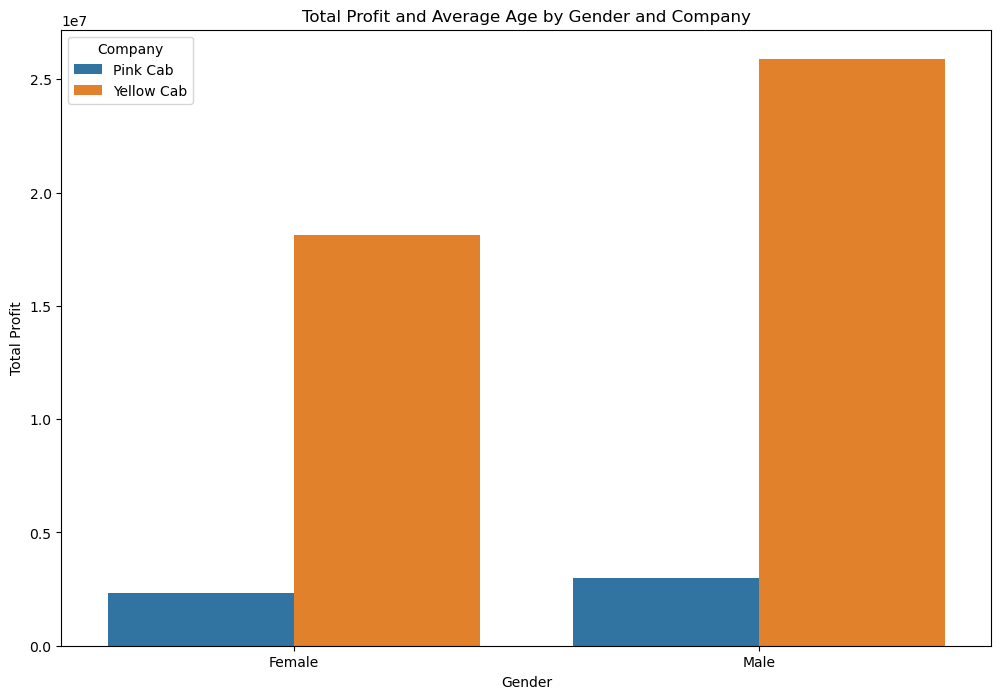

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a grouped bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Gender', y='Profit', hue='Company', data=grouped_data)
plt.title('Total Profit and Average Age by Gender and Company')
plt.xlabel('Gender')
plt.ylabel('Total Profit')
plt.show()


In [38]:
counts = df_master.groupby(['City', 'Company', 'Payment_Mode', 'Gender']).size().reset_index(name='Counts')
counts.head(10)

,City,Company,Payment_Mode,Gender,Counts
0,ATLANTA GA,Pink Cab,Card,Female,518
1,ATLANTA GA,Pink Cab,Card,Male,535
2,ATLANTA GA,Pink Cab,Cash,Female,366
3,ATLANTA GA,Pink Cab,Cash,Male,343
4,ATLANTA GA,Yellow Cab,Card,Female,1681
5,ATLANTA GA,Yellow Cab,Card,Male,1779
6,ATLANTA GA,Yellow Cab,Cash,Female,1159
7,ATLANTA GA,Yellow Cab,Cash,Male,1176
8,AUSTIN TX,Pink Cab,Card,Female,579
9,AUSTIN TX,Pink Cab,Card,Male,573


In [41]:
def plot_bar(group, title):
    plt.figure(figsize=(14,6))
    sns.barplot(x=group.index,y=group.values)     
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()
    print(group)
    
def distribution_graph(dataset, title, x, x_label, color):
    plt.figure(figsize=(14,6))
    ax=sns.histplot(data = dataset, x=x,bins=40, color= color)
    plt.title(title)
    plt.ylabel('Frequency')
    plt.xlabel(x_label)
    

In [42]:
#getting the counts for Month, Year, Company and City column

month = df_master.groupby(['Month'])['Transaction ID'].count()
year = df_master.groupby(['Year'])['Transaction ID'].count()
company = df_master.groupby(['Company'])['Transaction ID'].count()
city_cab = df_master.groupby(['City'])['Transaction ID'].count()


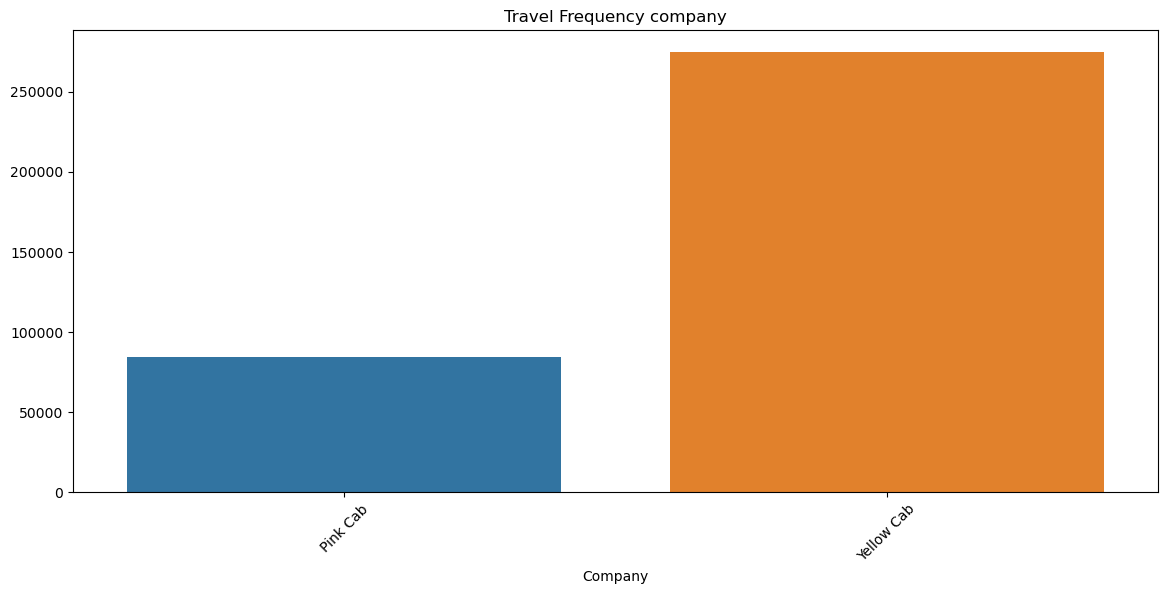

Company
Pink Cab       84711
Yellow Cab    274681
Name: Transaction ID, dtype: int64


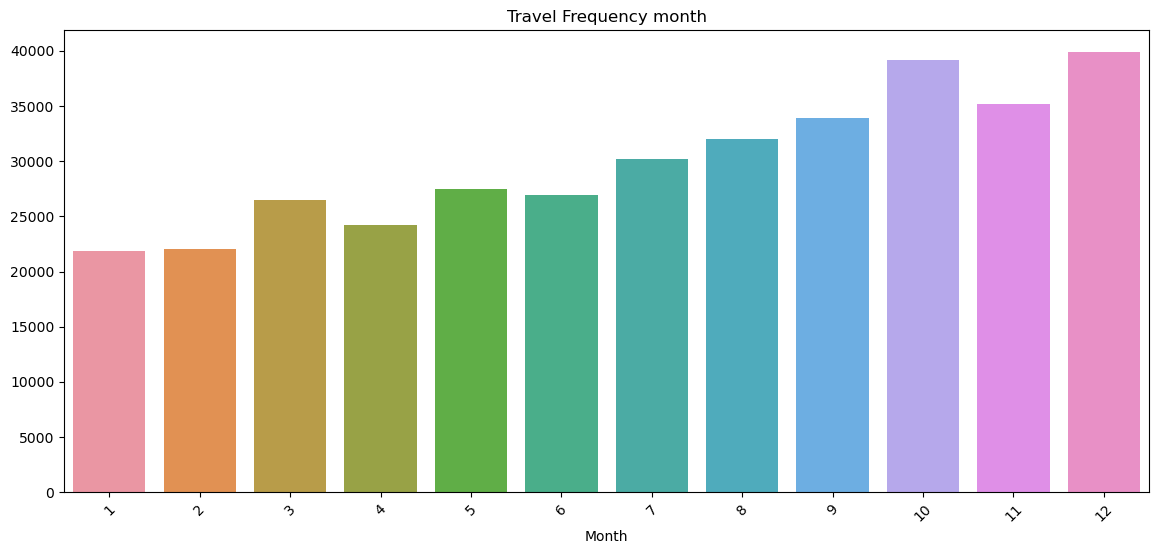

Month
1     21842
2     22031
3     26478
4     24195
5     27459
6     26939
7     30225
8     32038
9     33895
10    39209
11    35217
12    39864
Name: Transaction ID, dtype: int64


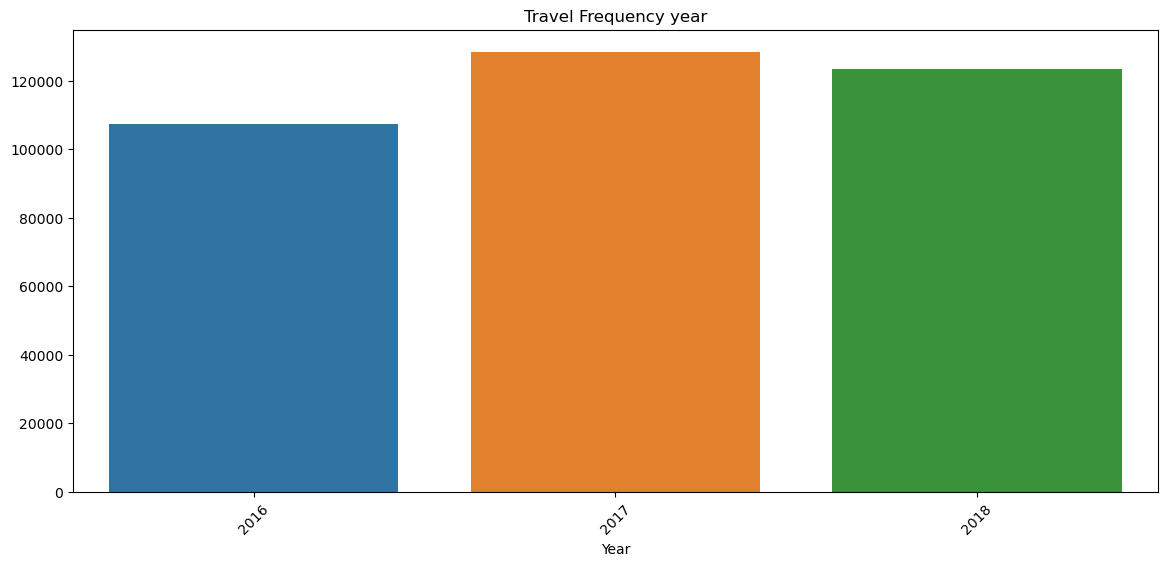

Year
2016    107319
2017    128510
2018    123563
Name: Transaction ID, dtype: int64


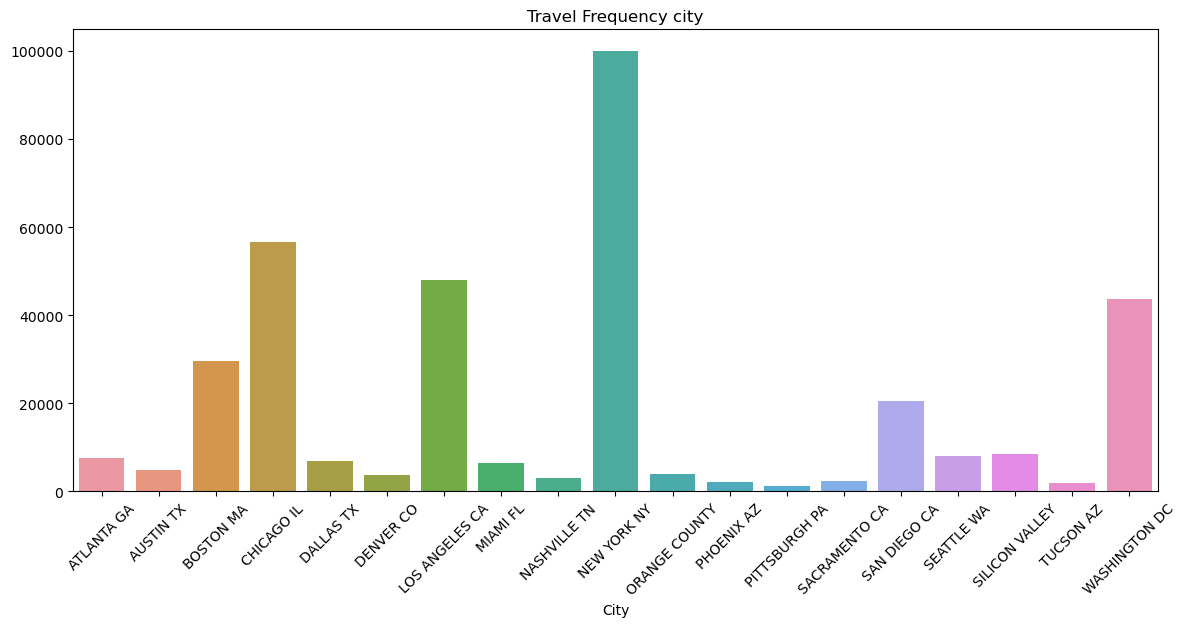

City
ATLANTA GA         7557
AUSTIN TX          4896
BOSTON MA         29692
CHICAGO IL        56625
DALLAS TX          7017
DENVER CO          3825
LOS ANGELES CA    48033
MIAMI FL           6454
NASHVILLE TN       3010
NEW YORK NY       99885
ORANGE COUNTY      3982
PHOENIX AZ         2064
PITTSBURGH PA      1313
SACRAMENTO CA      2367
SAN DIEGO CA      20488
SEATTLE WA         7997
SILICON VALLEY     8519
TUCSON AZ          1931
WASHINGTON DC     43737
Name: Transaction ID, dtype: int64


In [43]:
#visually displaying the counts with the tabluar data below it

groups = [company, month, year,city_cab]
names = ['company', 'month', 'year','city']
i=0    
for group in groups:
    title = 'Travel Frequency ' + names[i]
    plot_bar(group, title)
    i +=1

-Yellow Cab is used more than Pink Cab. 76.4% of the rides are by Yellow Cab.

-November and December (10 and 12) have the most rides. Jan and Feb being the least.

-2018 has the highest cab rides but the 'Year" column approximately has fairly distributed data

-NEW YORK NY has the highest number of rides vs PITTSBURGH PA with lowest.

Text(0.5, 0, 'Km Travelled')

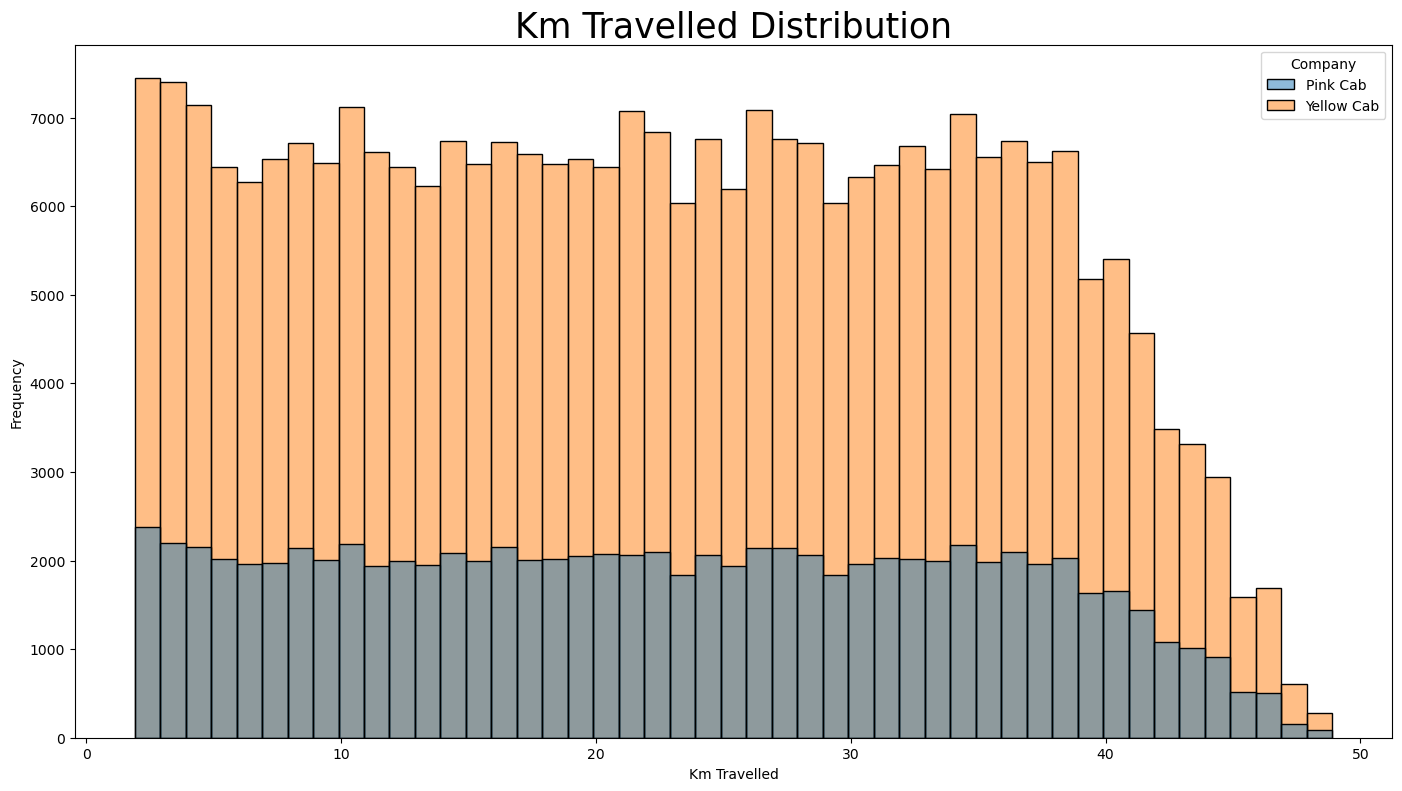

In [80]:
# KM TRAVELLED Distribution per Company
plt.figure(figsize=(17,9))
ax=sns.histplot(data=df_master, x="KM Travelled",binwidth=1,hue='Company')
plt.title('Km Travelled Distribution', fontsize=25)
plt.ylabel('Frequency')
plt.xlabel('Km Travelled')


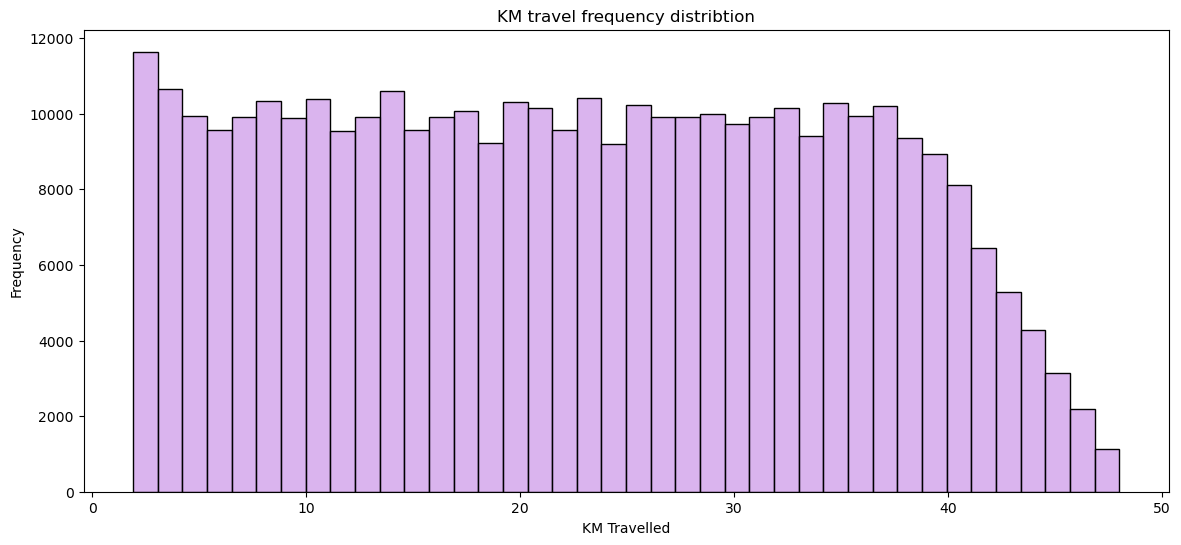

In [45]:
distribution_graph(df_master, 'KM travel frequency distribtion', 'KM Travelled', 'KM Travelled', '#ce9be9' )

After 40KM there is gradual linear decrease in number of rides

Text(0.5, 0, 'Price Charged')

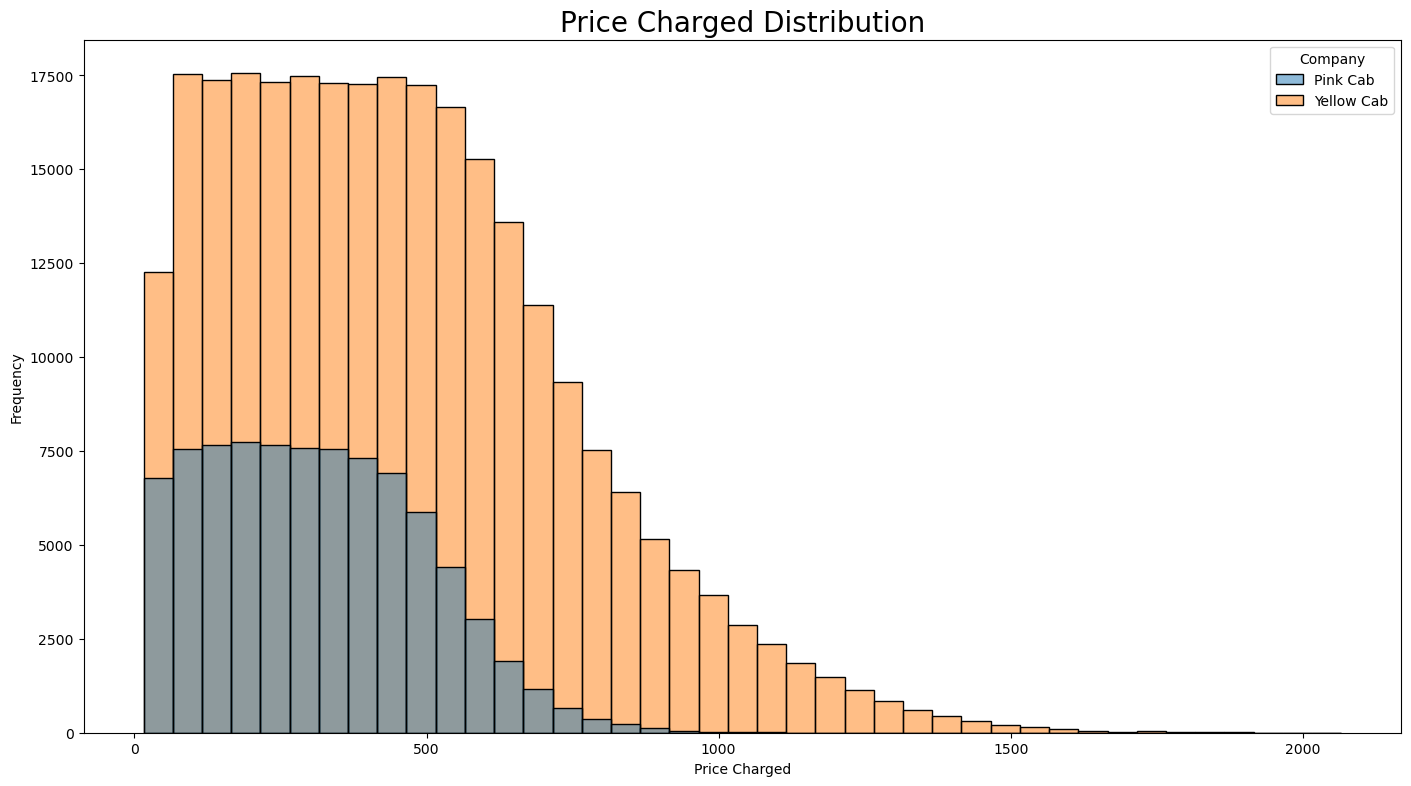

In [83]:
# Price Chrged Distribution per company 
plt.figure(figsize=(17,9))
ax=sns.histplot(data=df_master, x="Price Charged",binwidth=50,hue='Company')
plt.title('Price Charged Distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Price Charged')


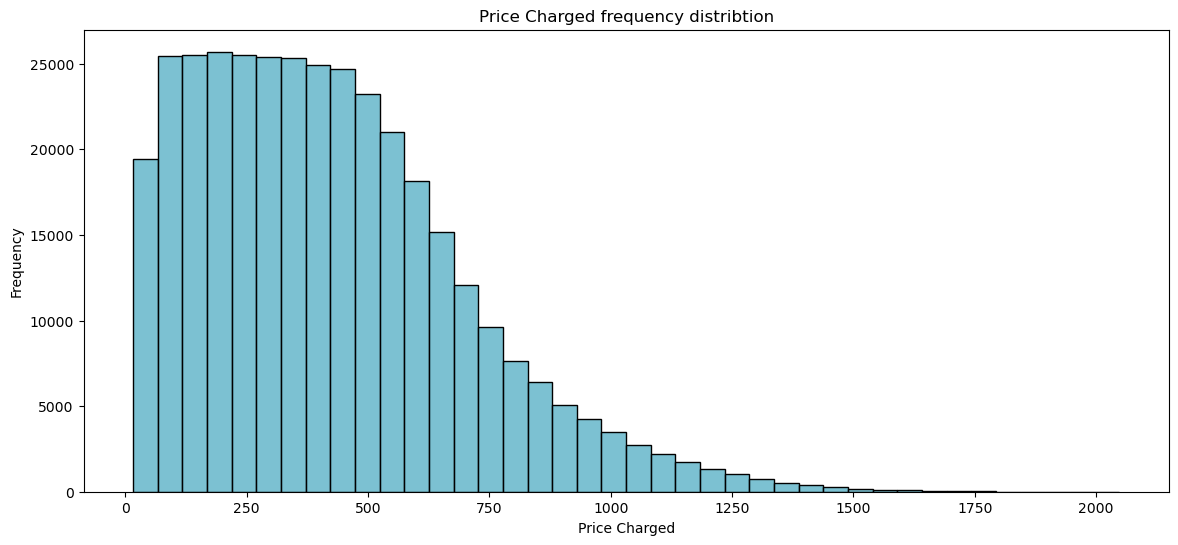

In [47]:
distribution_graph(df_master, 'Price Charged frequency distribtion', 'Price Charged', 'Price Charged', '#50acc3' )

After 400, there is an exponential decrease in number of rides

Text(0.5, 0, 'Cost of Trip')

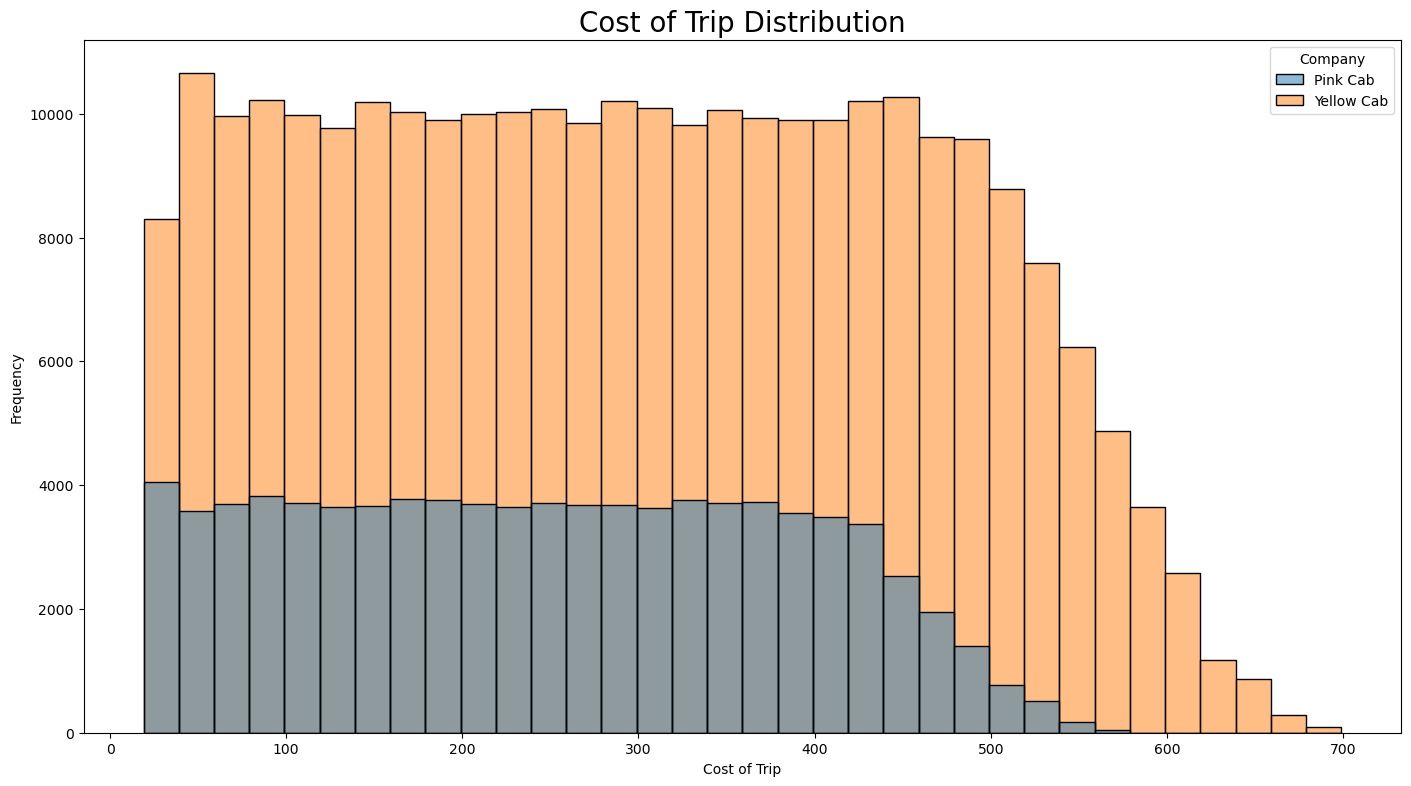

In [86]:
# Cost of Trip Distribution per company 
plt.figure(figsize=(17,9))
ax=sns.histplot(data=df_master, x="Cost of Trip",binwidth=20,hue='Company')
plt.title('Cost of Trip Distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Cost of Trip')


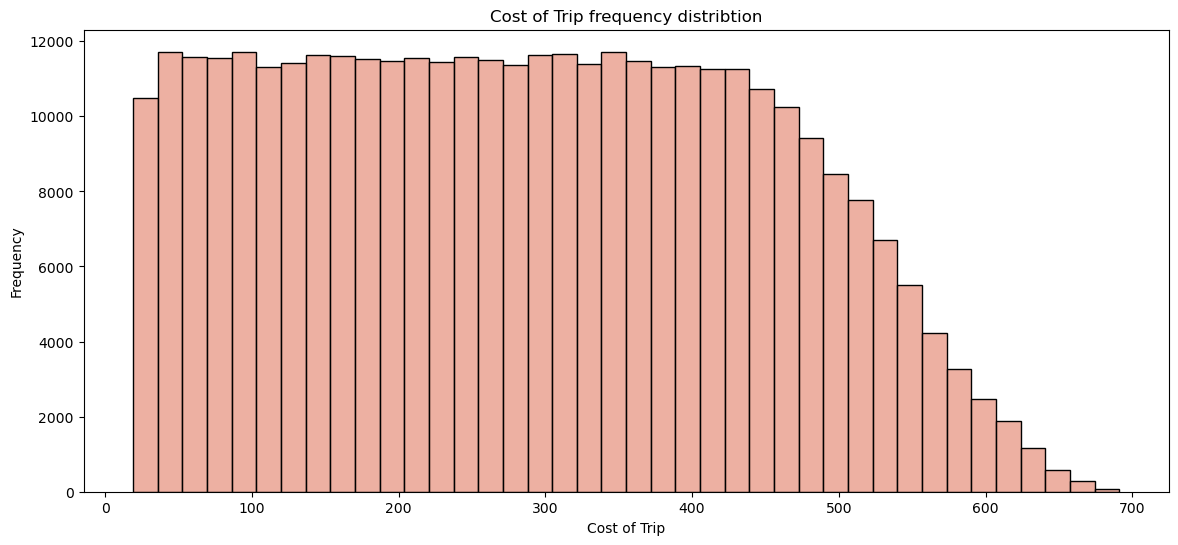

In [48]:
distribution_graph(df_master, 'Cost of Trip frequency distribtion', 'Cost of Trip', 'Cost of Trip', '#e79683' )

After around 420 dollars there is linear decrease in number of rides till it reaches 0 rides which costed around 700 dollars.

Text(0.5, 0, 'Profit_per_KM')

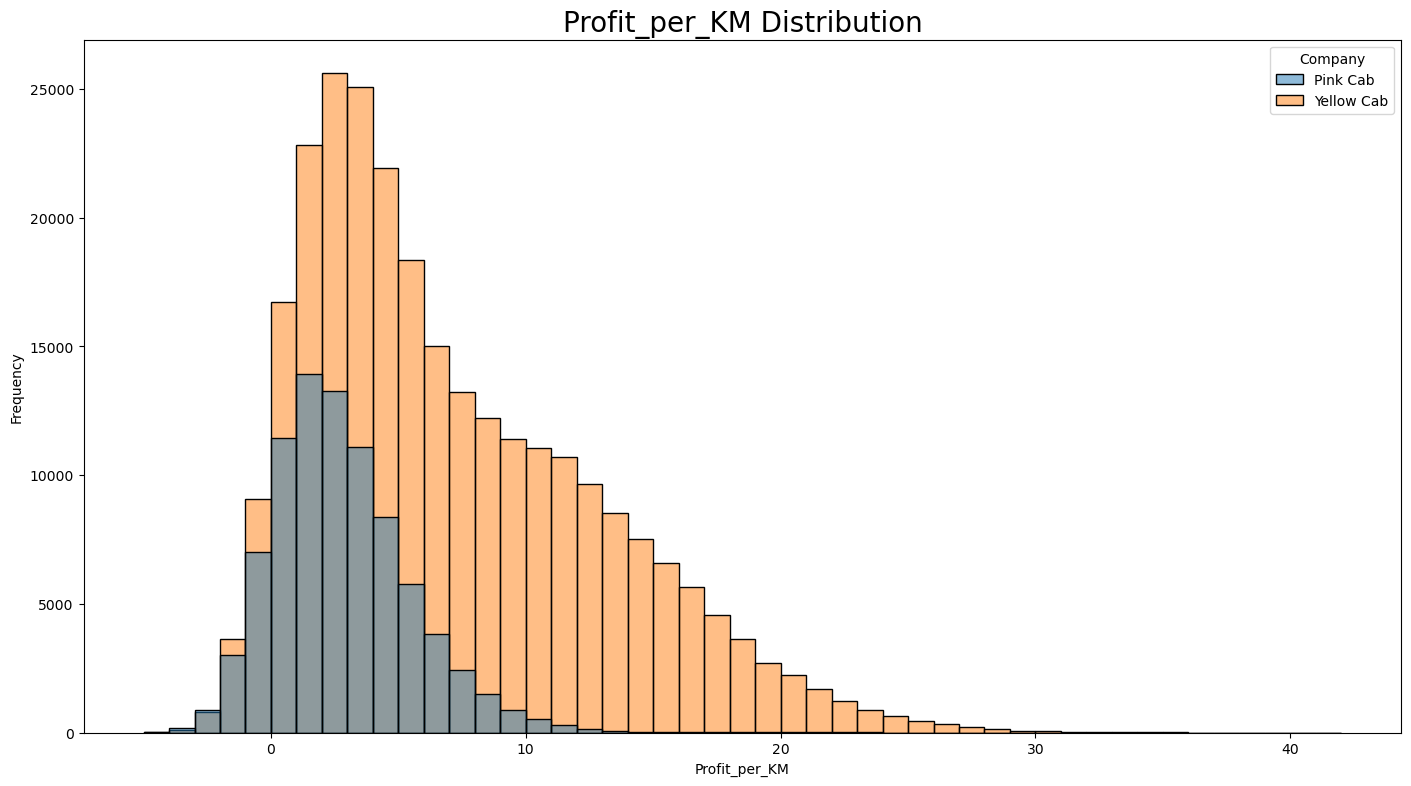

In [88]:
# Profit_per_KM Distribution per company 
plt.figure(figsize=(17,9))
ax=sns.histplot(data=df_master, x="Profit_per_KM",binwidth=1,hue='Company')
plt.title('Profit_per_KM Distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Profit_per_KM')


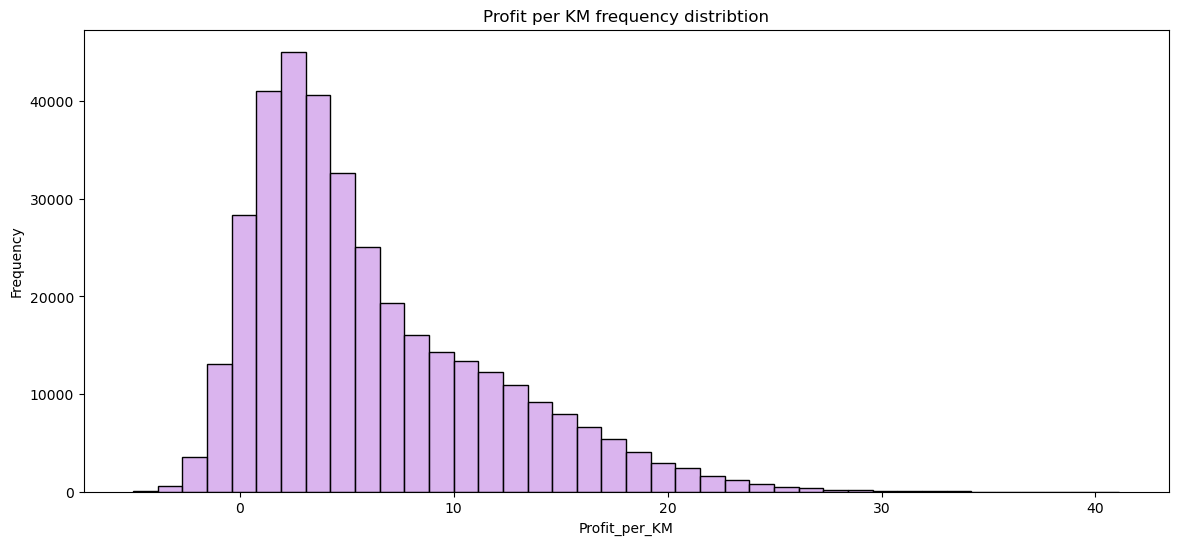

In [50]:
distribution_graph(df_master, 'Profit per KM frequency distribtion', 'Profit_per_KM', 'Profit_per_KM', '#ce9be9' )

Profit per KM is skewed towards right with few outliers

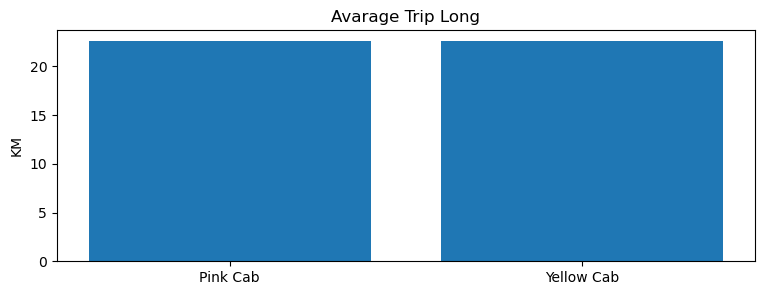

            KM Travelled
Company                 
Pink Cab       22.559917
Yellow Cab     22.569517


In [51]:
new = df_master[["Company", "KM Travelled"]]
new_df = (new.groupby("Company").mean()).sort_values(by="KM Travelled")

#visualization
plt.figure(figsize = (9,3))
plt.bar(new_df.index,new_df["KM Travelled"])
plt.ylabel("KM")
plt.title("Avarage Trip Long")
plt.show()

print(new_df)

Both the companies have same average KM travelled that is more than 20 KM

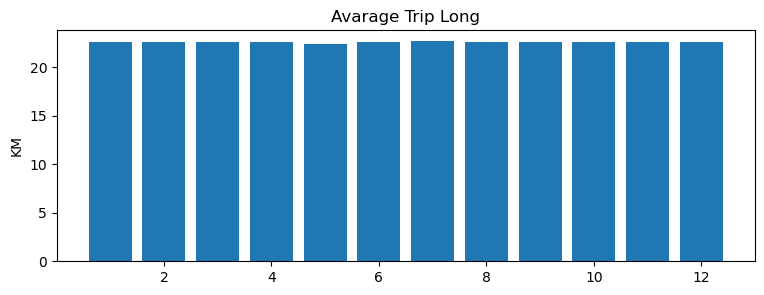

       KM Travelled
Month              
5         22.405801
9         22.527838
8         22.537612
6         22.554316
3         22.555264
2         22.569511
4         22.581677
10        22.593497
11        22.597415
1         22.603980
12        22.604417
7         22.653659


In [54]:
new2 = df_master[["Month", "KM Travelled"]]
new_df2 = (new2.groupby("Month").mean()).sort_values(by="KM Travelled")

#visualization
plt.figure(figsize = (9,3))
plt.bar(new_df2.index,new_df2["KM Travelled"])
plt.ylabel("KM")
plt.title("Avarage Trip Long")
plt.show()

print(new_df2)


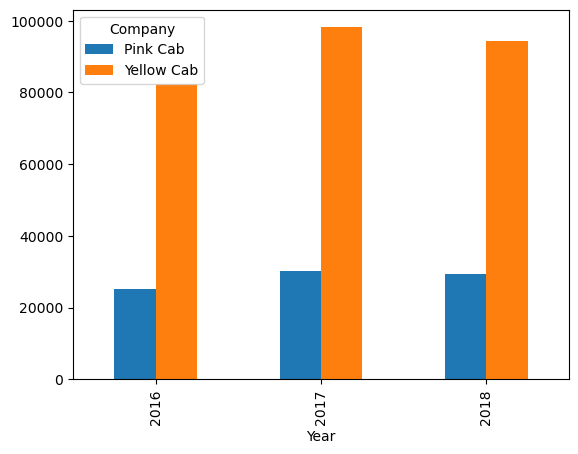

Company  Pink Cab  Yellow Cab
Year                         
2016        25080       82239
2017        30321       98189
2018        29310       94253


In [56]:
counts = df_master.groupby(['Year','Company'])['Transaction ID'].count().unstack()
ax = counts.plot(kind='bar',stacked = False)
plt.show()
print(counts)

- On an average Pink cab contributes to 23% in total cab count for all three years. Which is far lesser than the numbers of Yellow Cab. 
- Highest number of Pinkcabs and yellow cabs were used in the year 2017.
- Lowest number of Pinkcabs and yellow cabs were used in the year 2016.

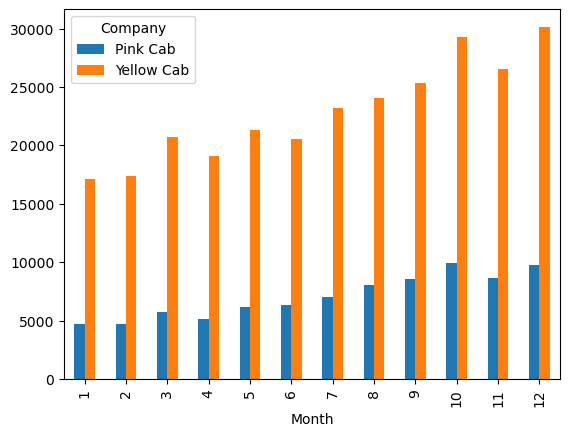

Company  Pink Cab  Yellow Cab
Month                        
1            4734       17108
2            4693       17338
3            5724       20754
4            5118       19077
5            6150       21309
6            6371       20568
7            7048       23177
8            8011       24027
9            8518       25377
10           9936       29273
11           8679       26538
12           9729       30135


In [57]:
counts = df_master.groupby(['Month','Company'])['Transaction ID'].count().unstack()
ax = counts.plot(kind='bar',stacked = False)
plt.show()
print(counts)

In [58]:
counts1 = df_master.groupby(['Year','Company']).Profit.mean().unstack()
print(counts1)
counts1 = df_master.groupby(['Month','Company']).ProfitPercentage.mean().unstack()
print(counts1)

Company   Pink Cab  Yellow Cab
Year                          
2016     68.321821  169.347833
2017     67.070850  168.817051
2018     53.229683  143.416112
Company   Pink Cab  Yellow Cab
Month                         
1        25.788619   58.576832
2        27.499855   61.410607
3        28.448698   58.920655
4        22.125848   57.052123
5        20.698403   65.309206
6        21.470959   60.316737
7        21.302679   49.538848
8        23.070982   46.064610
9        24.195371   54.085767
10       27.928655   49.722183
11       26.574931   47.300833
12       33.371078   51.953360


- Unlike Profit Percentage highest profit average of Pink Cab is in moth of December and lowest from May to July
- Unlike Profit Percentage highest profit average of Yellow Cab is in moth of Jan and Feb and lowest for August

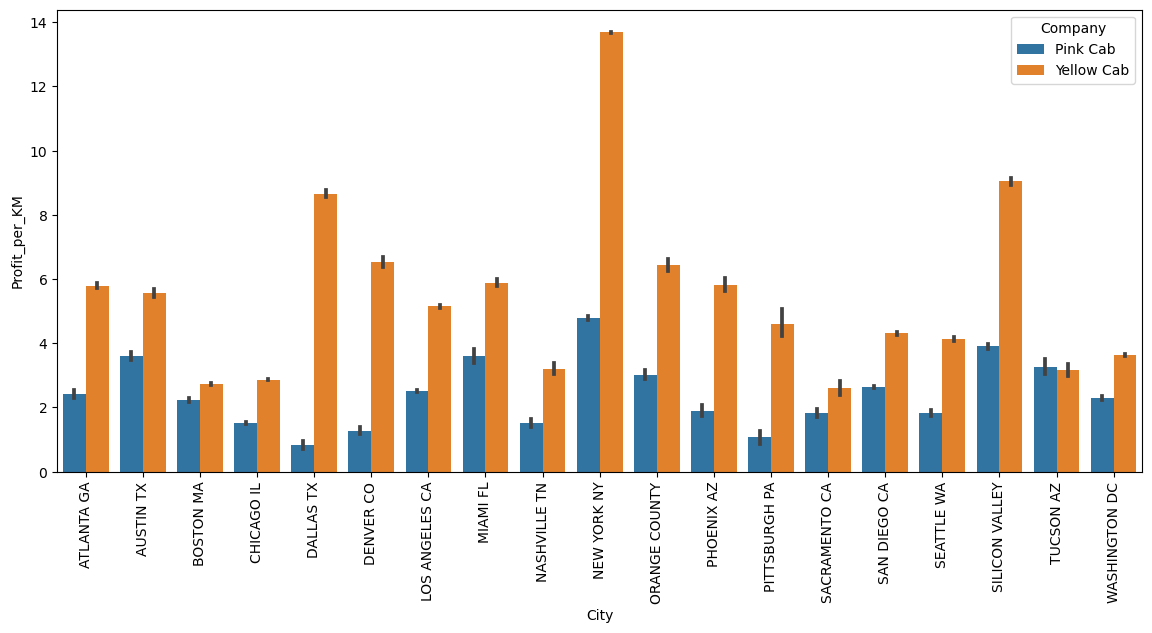

In [59]:
df = df_master.groupby(['City', 'Company']).agg(Profit_per_KM = ("Profit_per_KM", 'mean'))
df = df_master.reset_index()
dims = (14, 6)
fig, ax = plt.subplots(figsize= dims)
# plot barplot
g = sns.barplot(x="City", y="Profit_per_KM", hue="Company", ax=ax, data=df);
var = g.set_xticklabels(g.get_xticklabels(), rotation=90)

- In the above graph of Profit per KM, New York yields highest profits in terms of distance for both the companies.
- Dallas has lowest value in terms of profit per km for Pink Cab, and same goes for Sacramento for Yellow Cab.

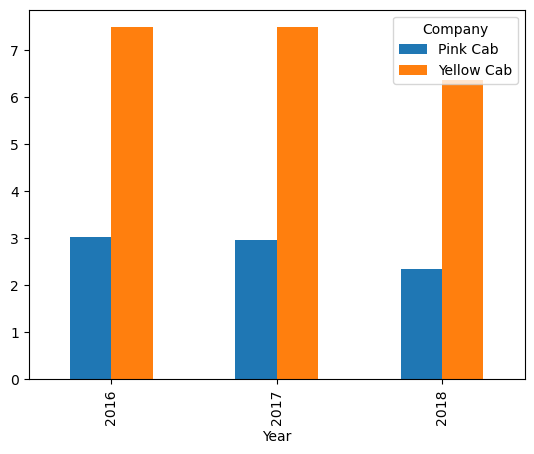

Company  Pink Cab  Yellow Cab
Year                         
2016     3.026804    7.489833
2017     2.962889    7.494595
2018     2.350450    6.364810


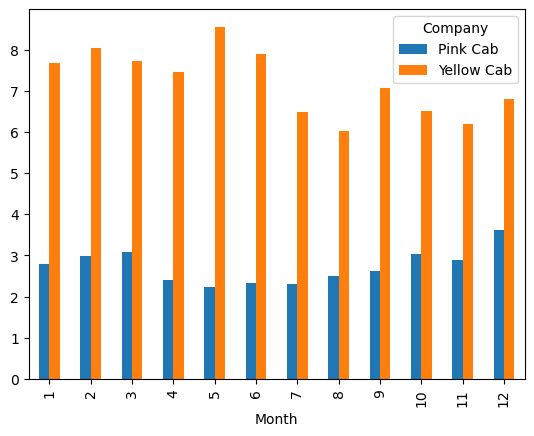

Company  Pink Cab  Yellow Cab
Month                        
1        2.793456    7.665883
2        2.979297    8.044650
3        3.092888    7.714983
4        2.393816    7.466124
5        2.234820    8.552031
6        2.320187    7.897729
7        2.303100    6.478932
8        2.496615    6.022016
9        2.620852    7.080586
10       3.024942    6.504135
11       2.884597    6.182996
12       3.628949    6.798695


In [61]:
counts1 = df_master.groupby(['Year','Company']).Profit_per_KM.mean().unstack()
ax = counts1.plot(kind='bar',stacked = False)
plt.show()
print(counts1)

counts1 = df_master.groupby(['Month','Company']).Profit_per_KM.mean().unstack()
ax = counts1.plot(kind='bar',stacked = False)
plt.show()
print(counts1)

Average distance travelled is constant with time over all three years and around 12 months

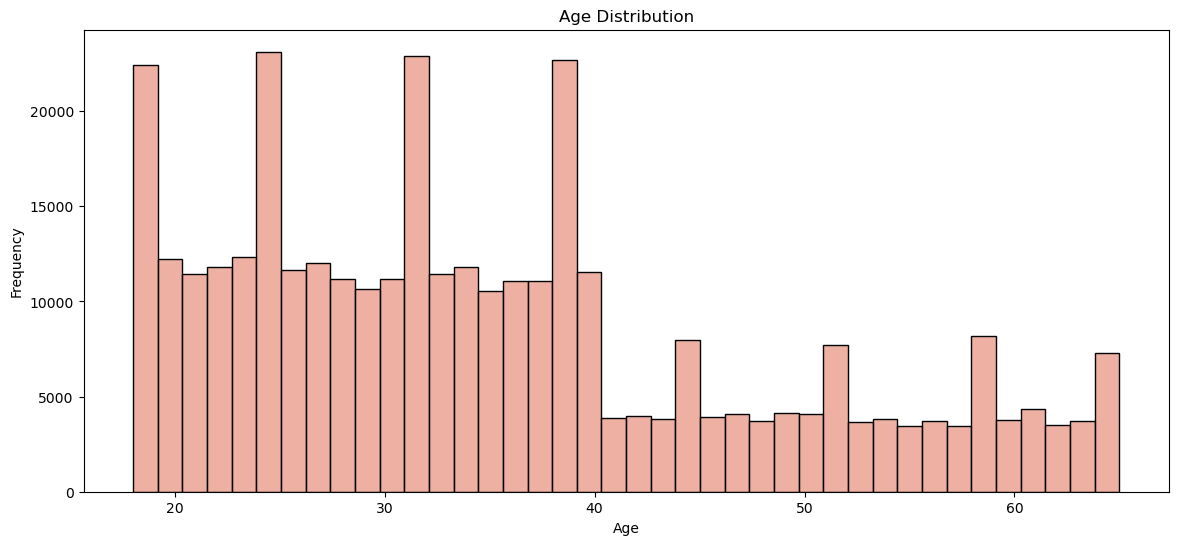

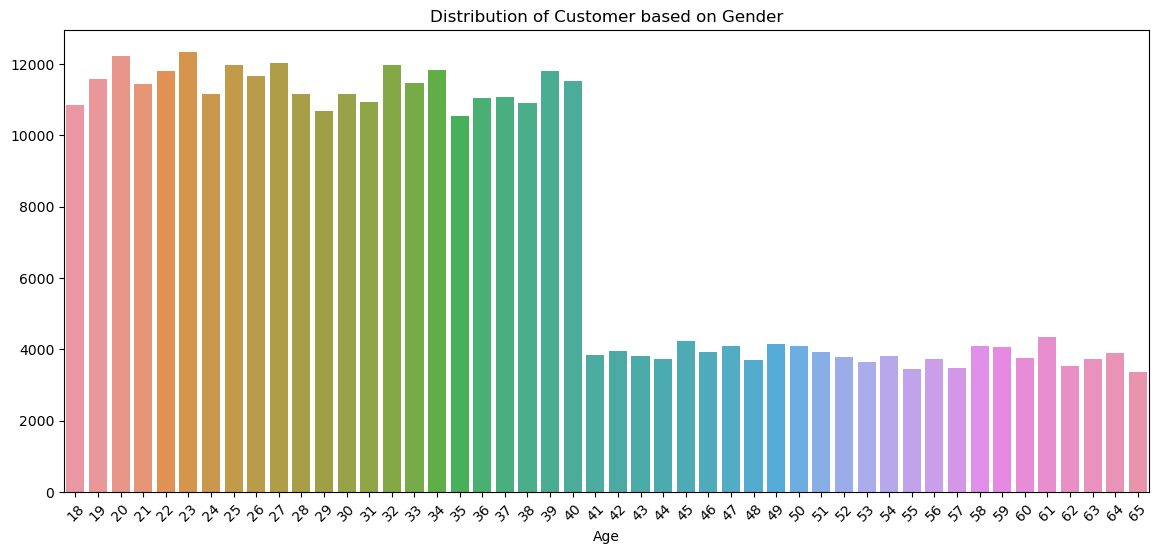

Age
18    10846
19    11591
20    12229
21    11431
22    11796
23    12327
24    11151
25    11973
26    11655
27    12030
28    11163
29    10675
30    11165
31    10930
32    11959
33    11457
34    11825
35    10555
36    11054
37    11086
38    10906
39    11798
40    11536
41     3852
42     3970
43     3823
44     3725
45     4248
46     3918
47     4087
48     3700
49     4158
50     4089
51     3931
52     3784
53     3641
54     3810
55     3442
56     3742
57     3473
58     4107
59     4068
60     3775
61     4361
62     3530
63     3733
64     3908
65     3379
Name: Customer ID, dtype: int64


In [63]:
distribution_graph(df_master, 'Age Distribution', 'Age', 'Age', '#e79683' )
age = df_master.groupby(['Age'])['Customer ID'].count()
plot_bar(age, 'Distribution of Customer based on Gender')

After the age og 40 there is a sudden drop in number of passengers. People younger than 40 form a larger part of customers

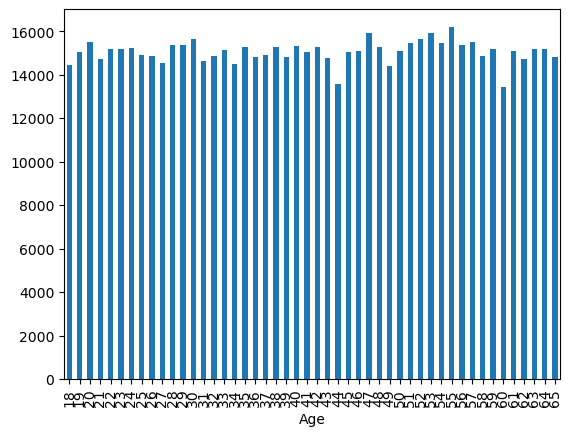

Max Income in the table is  35000
Min Income in the table is  2000


In [64]:
counts2 = df_master.groupby(['Age'])['Income (USD/Month)'].mean()
ax = counts2.plot(kind='bar',stacked = False)
plt.show()

print('Max Income in the table is ',df_master['Income (USD/Month)'].max())
print('Min Income in the table is ',df_master['Income (USD/Month)'].min())


Average income is constant amongst our customers for all ages

In [65]:
print('\n\nMean Income based on Gender and Age') 
print(df_master.groupby(['Gender','Age'])['Income (USD/Month)'].mean())




Mean Income based on Gender and Age
Gender  Age
Female  18     14881.966617
        19     15096.404933
        20     15056.500447
        21     14932.317946
        22     14854.033685
                   ...     
Male    61     15359.589879
        62     14312.894317
        63     15587.335714
        64     14583.994550
        65     14312.874861
Name: Income (USD/Month), Length: 96, dtype: float64


Average Income is almost same (14k to 15k) for each age and for both males and females

#### For City Data 

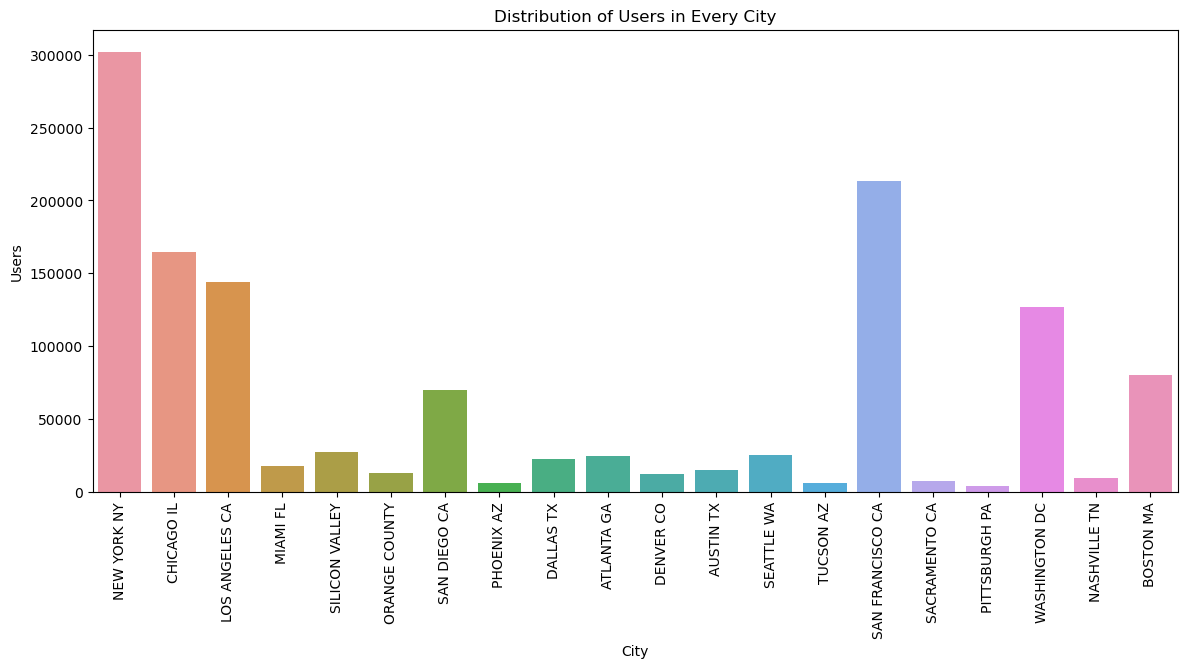

In [72]:
plt.figure(figsize=(14,6))
sns.barplot(x= df_City.City, y=df_City.Users)     
plt.title('Distribution of Users in Every City')
plt.xticks(rotation=90)
plt.show()


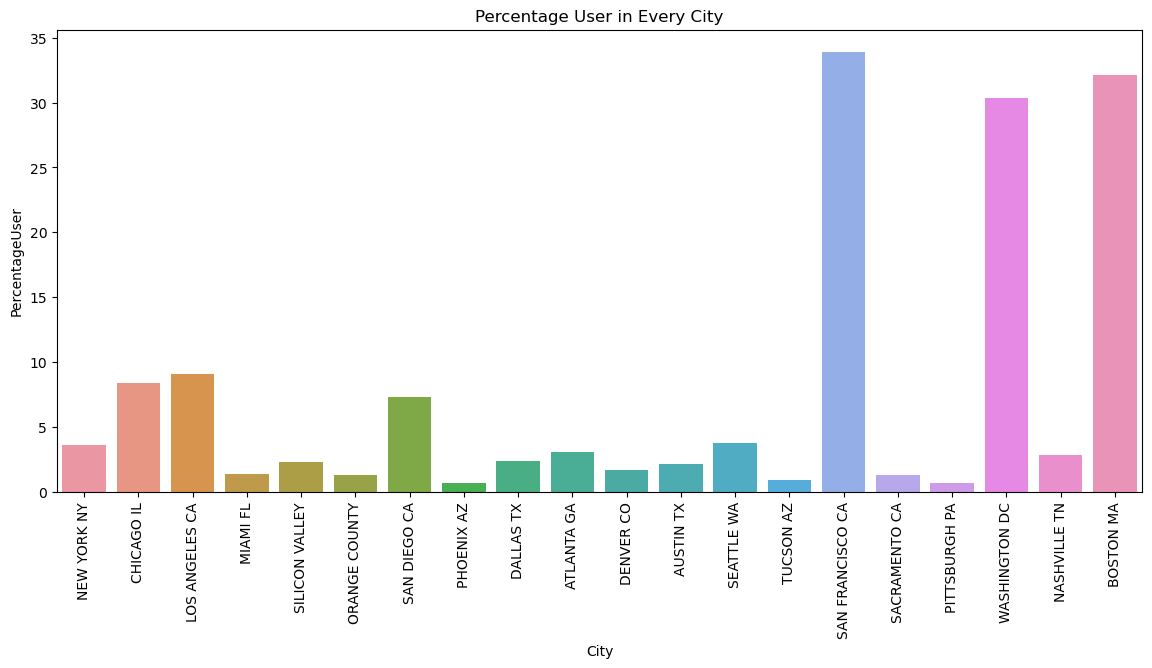

In [73]:
plt.figure(figsize=(14,6))
sns.barplot(x= df_City.City, y=df_City.PercentageUser)     
plt.title('Percentage User in Every City')
plt.xticks(rotation=90)
plt.show()

- Users and Percentage of users shows no relation between one another.
- Highest number of users is in NEW YORK NY but highest number of percenatge users is in SAN FRANCISCO CA

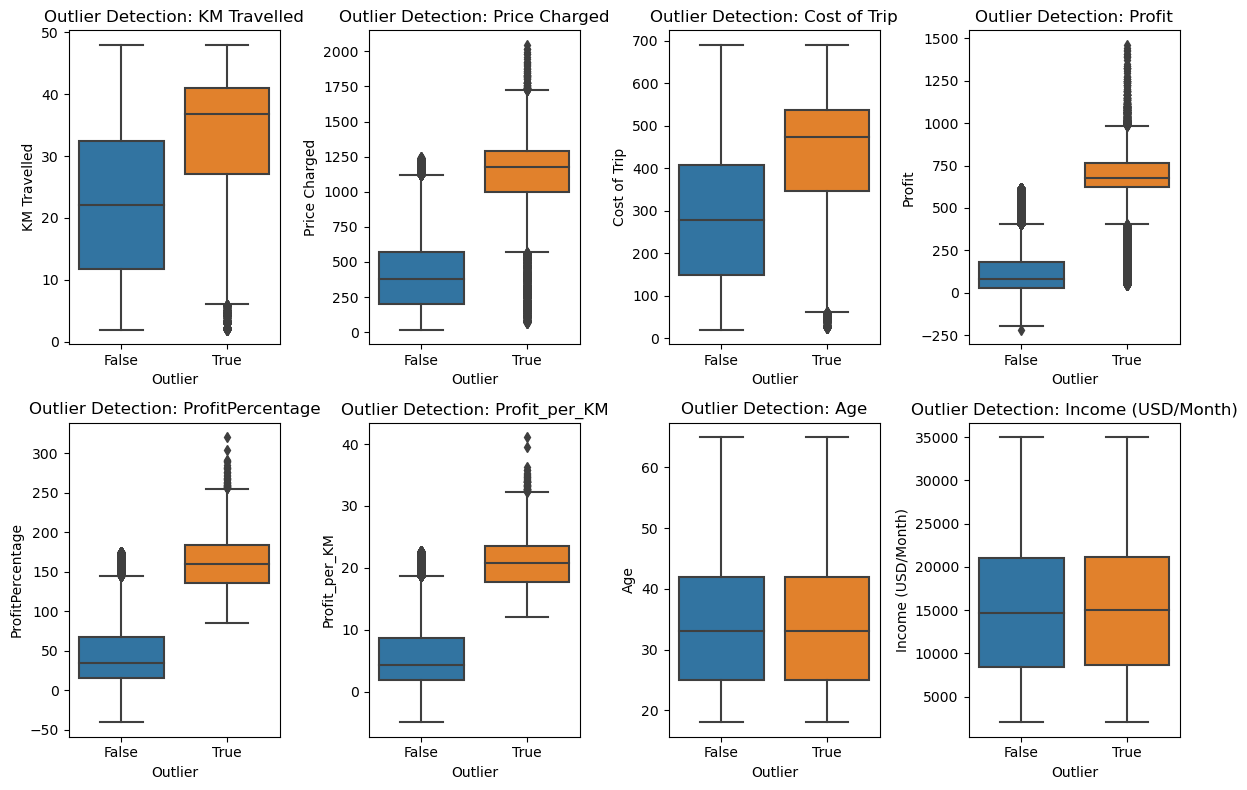

Count of outliers: 9462


In [77]:
#Outlierdetection using Zscore method 
from scipy.stats import zscore

numerical_columns = ['KM Travelled', 'Price Charged', 'Cost of Trip', 'Profit', 'ProfitPercentage','Profit_per_KM', 'Age', 'Income (USD/Month)']

# Create a new DataFrame with only numerical columns
df_numerical = df_master[numerical_columns]

# Calculate Z-scores for each numerical column
z_scores = zscore(df_numerical)

# Define a threshold for outliers (you can adjust this threshold)
z_score_threshold = 3

# Identify outliers using the Z-score method
outliers = (abs(z_scores) > z_score_threshold)

# Create a new column in the original DataFrame indicating outliers
df_master['Outlier'] = outliers.any(axis=1)

# Visualize outliers using boxplots
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x='Outlier', y=column, data=df_master)
    plt.title(f'Outlier Detection: {column}')

plt.tight_layout()
plt.show()

# Display the count of outliers
print("Count of outliers:", df_master['Outlier'].sum())

The Z-score method is another approach for identifying outliers. The Z-score measures how many standard deviations a data point is from the mean. Typically, data points with a Z-score greater than a certain threshold (often 2 or 3) are considered outliers.

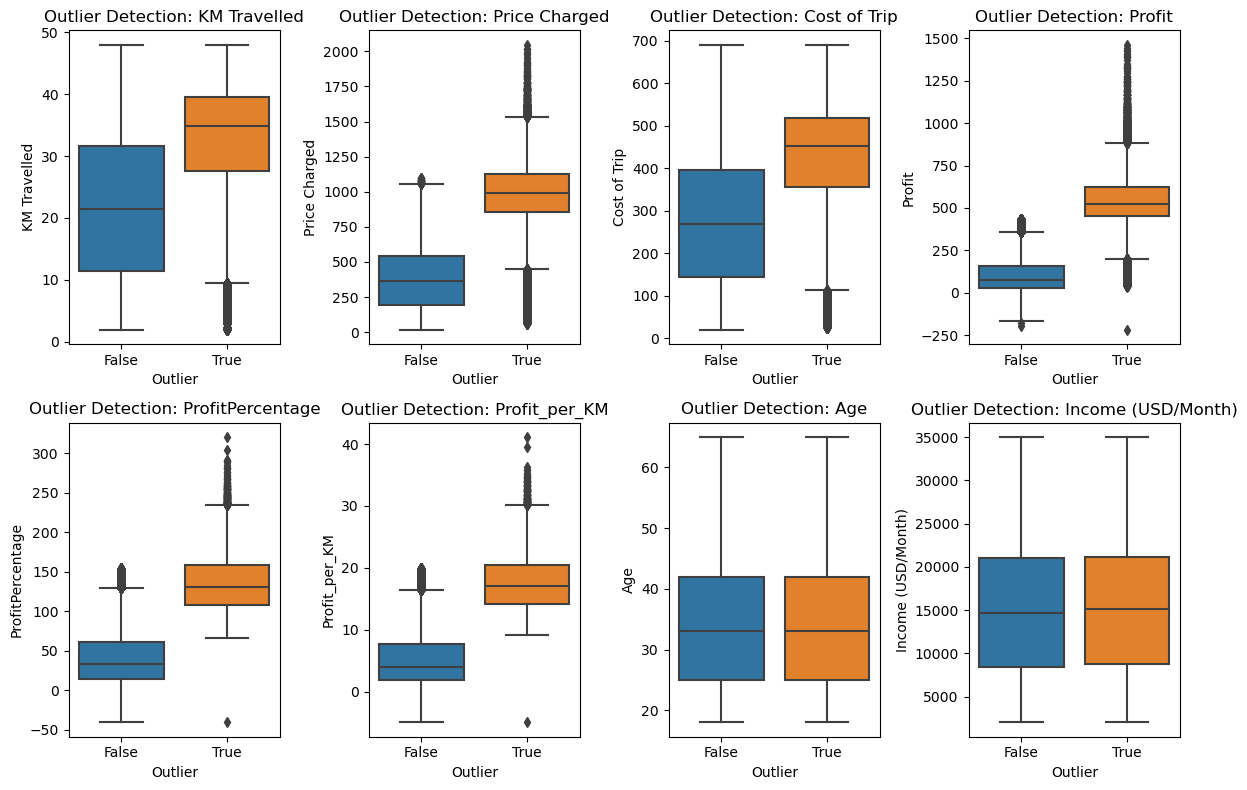

Count of outliers: 27576


In [79]:
# Extract numerical columns for outlier analysis
numerical_columns = ['KM Travelled', 'Price Charged', 'Cost of Trip', 'Profit', 'ProfitPercentage','Profit_per_KM', 'Age', 'Income (USD/Month)']

# Create a new DataFrame with only numerical columns
df_numerical = df_master[numerical_columns]

# Calculate the IQR for each numerical column
Q1 = df_numerical.quantile(0.25)
Q3 = df_numerical.quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for outliers (you can adjust this threshold)
outlier_threshold = 1.5

# Identify outliers using the IQR method
outliers = ((df_numerical < (Q1 - outlier_threshold * IQR)) | (df_numerical > (Q3 + outlier_threshold * IQR)))

# Create a new column in the original DataFrame indicating outliers
df_master['Outlier'] = outliers.any(axis=1)

# Visualize outliers using boxplots
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x='Outlier', y=column, data=df_master)
    plt.title(f'Outlier Detection: {column}')

plt.tight_layout()
plt.show()

# Display the count of outliers
print("Count of outliers:", df_master['Outlier'].sum())

The IQR is calculated for each numerical column.
Outliers are identified using a threshold (1.5 times the IQR, but you can adjust this threshold based on your requirements).
A new column 'Outlier' is added to the original DataFrame, indicating whether each row is an outlier or not.
Boxplots are created for each numerical column, visualizing the distribution of values and highlighting the outliers.

True (1): Data points marked as True are considered outliers based on the criteria used for outlier detection. These points fall beyond the whiskers of the boxplot.

False (0): Data points marked as False are not considered outliers based on the specified criterion. They fall within the whiskers of the boxplot.

By visually inspecting the boxplot, you can identify the spread of the data, the presence of outliers, and how the dataset is distributed. The boxplot helps in understanding the central tendency and variability of the dataset. The True and False values are essentially indicating which points are considered outliers in the context of the chosen outlier detection method.

In [91]:
df_master.tail()

,Transaction ID,Customer ID,Date of Travel,Year,Month,City,KM Travelled,Price Charged,Cost of Trip,Profit,ProfitPercentage,Profit_per_KM,Gender,Age,Age Group,Income (USD/Month),Payment_Mode,Company,Outlier
359387,10440101,52392,2018-08-01,2018,8,WASHINGTON DC,4.80,69.24,63.36,5.88,9.28,1.22,Male,24,20-29 years old,15651,Cash,Yellow Cab,False
359388,10440104,53286,2018-04-01,2018,4,WASHINGTON DC,8.40,113.75,106.85,6.90,6.46,0.82,Male,32,30-39 years old,6528,Cash,Yellow Cab,False
359389,10440105,52265,2018-05-01,2018,5,WASHINGTON DC,27.75,437.07,349.65,87.42,25.00,3.15,Male,56,50-59 years old,7966,Cash,Yellow Cab,False
359390,10440106,52175,2018-05-01,2018,5,WASHINGTON DC,8.80,146.19,114.05,32.14,28.18,3.65,Male,32,30-39 years old,6423,Card,Yellow Cab,False
359391,10440107,52917,2018-02-01,2018,2,WASHINGTON DC,12.76,191.58,177.62,13.96,7.86,1.09,Male,20,20-29 years old,11284,Card,Yellow Cab,False



Summary of Business Insights and Recommendations:

- Profit Analysis:

Overall Profitability: Yellow Cab consistently outperforms Pink Cab in terms of profitability. The profit rate of the cab market is approximately 50%, with Yellow Cab showing a higher yearly profit rate (48% - 56%) compared to Pink Cab (21% - 27%).
Market Share: Yellow Cab has a significantly larger market share than Pink Cab, contributing to its higher overall profits.

- Demand Analysis:

Total Demand: Yellow Cab experiences more than triple the demand compared to Pink Cab, indicating a higher level of popularity and usage among customers.
Demand Distribution: Both companies show a similar distribution of demand across different age groups.

- Customer Analysis:

Loyalty Rates: Yellow Cab demonstrates higher loyalty rates among customers, both in terms of high and medium loyalty rates.
Payment Mode Distribution: The distribution of payment modes is similar for both companies, with card payments being more popular and profitable.

- City-wise Analysis:

Yellow Cab has a dominant presence in most cities, except for San Diego, Sacramento, Pittsburgh, and Nashville.
The analysis of cities indicates that Yellow Cab is better positioned in terms of market share and profitability.
Monthly and Seasonal Trends:

Monthly trends show that the months near the end of the year, particularly December, have the highest profits, likely due to increased holiday travel.
Daily trends reveal higher profits on weekends, with occasional spikes on specific days, such as May 1st, 2018, requiring further investigation.
Gender Analysis:

While not explicitly stated in the summary, it seems that male passengers contribute more to profits. Further exploration is recommended to understand the factors driving this difference.

- Investment Recommendation:

Considering the higher profitability, market share, and demand for Yellow Cab, the top-level recommendation is to invest in Yellow Cab for better growth and return on investment.
Future Considerations:

The dataset covers only three years, and the trend in Yellow Cab's profit shows a slight decrease in 2018. Further monitoring and analysis are recommended to assess Yellow Cab's ability to sustain and improve its profit indexes in the future.
This summary provides a comprehensive overview of the key business insights derived from the analysis. It highlights the strengths of Yellow Cab in terms of profitability, market share, and customer loyalty, making it a preferable choice for investment.